<a href="https://colab.research.google.com/github/SimranTrivedi/pandas/blob/main/Binary_classification(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# NatpLot Lib	is	going to be used for	visuaL isations
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# f-ron scipy. spec iaL inport softnax
from sklearn.metrics import roc_curve, roc_auc_score
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from itertools import cycle, combinations
import random
import math
from math import ceil
from scipy import optimize as op
import seaborn as sns








In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.xlsx to diabetes.xlsx


In [ ]:
data = pd.read_excel('diabetes.xlsx')  # use the actual file name
print(data.head())
print(data.shape)



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [ ]:
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

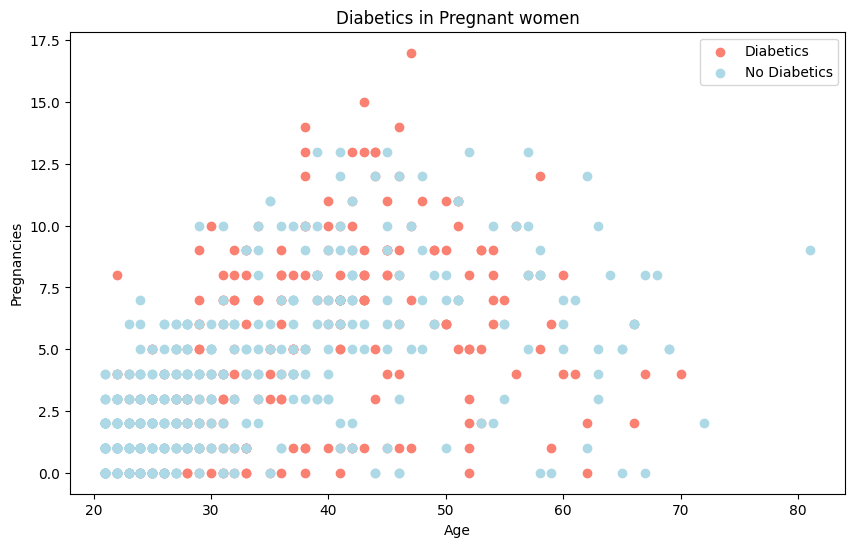

In [ ]:
plt.figure(figsize=(10,6))
df=data

plt.scatter(df.Age[df.Outcome==1],
 df.Pregnancies[df.Outcome==1],c="salmon")
plt.scatter(df.Age[df.Outcome==0 ],
df.Pregnancies[df.Outcome==0],
            c="lightblue")

plt.title("Diabetics in Pregnant women")
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend(["Diabetics","No Diabetics"]);


In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop('Outcome',axis=1)
print(x.shape)
print(x[:10])
y = data[['Outcome']]
print(y[:10])
print(y.shape)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(768, 8)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
# print(x_train[ : 5)
x_test=scaler.transform(x_test)
# print(x_test[ : 5])
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print(x_test[1])


x_train (614, 8)
x_test (154, 8)
[ 0.34930338  0.35231486  0.55815582 -1.31684684 -0.71807607 -0.6438749
 -0.87584698  3.00159984]


In [ ]:
def sigmoid(x):
 return 1/(1+np.exp(-x))



In [ ]:
def cost_compute(y, y_hat):
 cost = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
 return cost


In [ ]:
def stochastic(x,y):
  w=np.zeros(shape=(1,x.shape[1]))
  print(w)
  b=0
  learning_rate = 0.01
  m=len(y)
  iterations=40
  cost_list = []
  for i in range(iterations):
    for j in range(m) :
      prediction=sigmoid(np.dot(w,x[j])+b)
      loss_value=cost_compute(y[j],prediction)
      w_gradient=-x[j]*(y[j]-(prediction))
      b_gradient=-(y[j]-(prediction))
      w=w-learning_rate*(w_gradient)
      b=b-learning_rate*(b_gradient)
  return w,b,cost_list

def predict(x,w,b):
  y_pred=[]
  for i in range(len(x)):
    y=np.ndarray.item(np.dot(w,x[i]+b))
    if sigmoid(y)<0.5:
     y_pred.append(0)
    else:
     y_pred.append(1)
  return np.array(y_pred)





In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
w,b,cost_list=stochastic(x_train,y_train)
print(w)
print(b)
print(len(cost_list))

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0.49390992  1.08499161 -0.34095021 -0.0691788  -0.0421225   0.71486743
   0.36269331  0.21620582]]
[-0.8457038]
0


In [ ]:
y_pred=predict(x_test,w,b)
print("Predicted Classes")
print(y_pred)
print("Original Classes")
print(y_test.T)

Predicted Classes
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0]
Original Classes
         567  123  615  492  288  383  642  178  84   594  ...  89   250  510  \
Outcome    0    0    0    0    0    0    1    0    1    0  ...    0    0    1   

         296  35   432  480  7    564  40   
Outcome    1    0    0    1    0    0    0  

[1 rows x 154 columns]


In [ ]:
import numpy as np

# Always convert to NumPy arrays to avoid KeyErrors from Pandas
y_pred_np = np.array(y_pred).flatten()
y_test_np = np.array(y_test).flatten()

# Confusion matrix
def cm(x, y):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for i in range(len(x)):
        if x[i] == 1 and y[i] == 1:
            tp += 1
        elif x[i] == 1 and y[i] == 0:
            fp += 1
        elif x[i] == 0 and y[i] == 0:
            tn += 1
        elif x[i] == 0 and y[i] == 1:
            fn += 1

    return tp, fp, fn, tn

# Accuracy
def acc(x, y):
    x = np.array(x).flatten()
    y = np.array(y).flatten()
    tp, fp, fn, tn = cm(x, y)
    acc_score = (tp + tn) / (tp + fp + fn + tn)
    return acc_score

# Print output
print("Confusion Matrix (TP, FP, FN, TN):")
print(cm(y_pred_np, y_test_np))

print("Average Accuracy:")
print(acc(y_pred_np, y_test_np))


Confusion Matrix (TP, FP, FN, TN):
(19, 2, 35, 98)
Average Accuracy:
0.7597402597402597


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       133
           1       0.35      0.90      0.51        21

    accuracy                           0.76       154
   macro avg       0.67      0.82      0.67       154
weighted avg       0.89      0.76      0.80       154

